In [ ]:
# Bayes classification using Gaussian distributions.

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

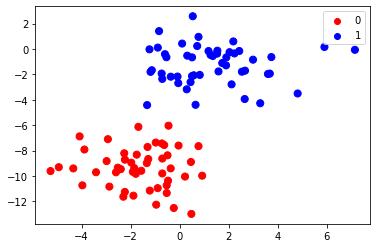

In [6]:
X,y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
colors=np.array(["red", "blue"])
plt.scatter(X[:, 0], X[:, 1], c=colors[y], s=50)
for label, c in enumerate(colors):
    plt.scatter([], [], c=c, label=str(label))
plt.legend();

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
model = GaussianNB()
#model = MultinomialNB()
model.fit(X, y);

In [8]:
"""Naive Bayes algorithm fitted two 2-dimensional Gaussian distribution to the 
data. The means and the variances define these distributions completely."""

print("Means:", model.theta_)
print("Standard deviations:", model.sigma_)

Means: [[-1.64939095 -9.36891451]
 [ 1.29327924 -1.24101221]]
Standard deviations: [[2.06097005 2.47716872]
 [3.33164807 2.22401384]]


In [9]:
# helper function to draw an ellipse that gives the standard deviation in each 
# direction from the origo.

def plot_ellipse(ax, mu, sigma, color="k", label=None):
    """
    Based on
    http://stackoverflow.com/questions/17952171/not-sure-how-to-fit-data-with-a-gaussian-python.
    """
    from matplotlib.patches import Ellipse
    # Compute eigenvalues and associated eigenvectors
    vals, vecs = np.linalg.eigh(sigma)

    # Compute "tilt" of ellipse using first eigenvector
    x, y = vecs[:, 0]
    theta = np.degrees(np.arctan2(y, x))

    # Eigenvalues give length of ellipse along each eigenvector
    w, h = 2 * np.sqrt(vals)

    ax.tick_params(axis='both', which='major', labelsize=20)
    ellipse = Ellipse(mu, w, h, theta, color=color, label=label)  # color="k")
    ellipse.set_clip_box(ax.bbox)
    ellipse.set_alpha(0.2)
    ax.add_artist(ellipse)
    return ellipse

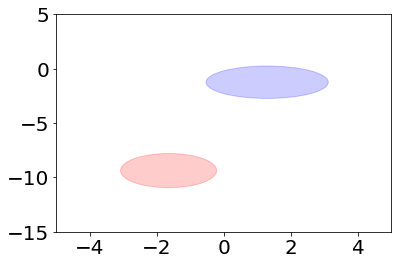

In [10]:
plt.figure()
plt.xlim(-5, 5)
plt.ylim(-15, 5)
plot_ellipse(plt.gca(), model.theta_[0], np.identity(2)*model.sigma_[0], color="red")
plot_ellipse(plt.gca(), model.theta_[1], np.identity(2)*model.sigma_[1], color="blue");

In [11]:
# Accuracy score gives a measure about how well we managed to predict the labels. The maximum value is 1.0.

from sklearn.metrics import accuracy_score

y_fitted = model.predict(X)
acc=accuracy_score(y,y_fitted)
print("Accuracy score is", acc)

Accuracy score is 1.0


In [12]:
# The score was the best possible, which is not a surprise, since we tried to 
# predict the data we had already seen!

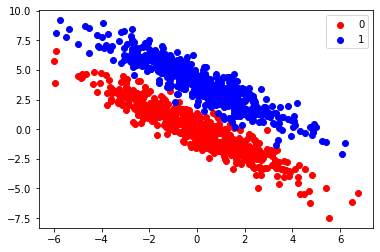

In [13]:
# Generating some more data using multivariate normal distributions.

cov=np.array([[ 4.68, -4.32], [-4.32,  4.68]])
mean1 = [0,0]
mean2 = [0,4]
n=500
x1 = np.random.multivariate_normal(mean1, cov, n).T
x2 = np.random.multivariate_normal(mean2, cov, n).T
X=np.vstack([x1.T,x2.T])
y=np.hstack([[0]*n, [1]*n]).T
plt.scatter(X[:n,0], X[:n,1], color="red", label=0)
plt.scatter(X[n:,0], X[n:,1], color="blue", label=1)
plt.legend();

In [14]:
"""The two clusters seem to be quite separate. Let’s try naive Bayesian 
classification on this data."""

model = GaussianNB()
#model = MultinomialNB()
model.fit(X, y);

In [15]:
print("Means:", model.theta_)
print("Standard deviations:", model.sigma_)

Means: [[ 0.01121237 -0.01096399]
 [ 0.12706733  3.88389263]]
Standard deviations: [[4.60120595 4.63713806]
 [4.142506   4.00116357]]


Accuracy score is 0.831


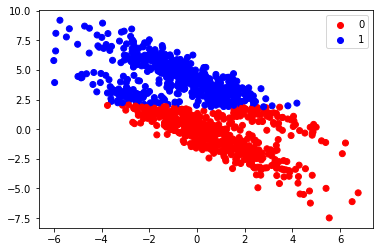

In [16]:
y_fitted = model.predict(X)
colors=np.array(["red", "blue"])
plt.scatter(X[:,0], X[:,1], color=colors[y_fitted])
plt.scatter([], [], color="red", label="0")
plt.scatter([], [], color="blue", label="1")
from sklearn.metrics import accuracy_score
acc=accuracy_score(y,y_fitted)
plt.legend()
print("Accuracy score is", acc)

In [ ]:
"""Even thought the score is quite good, we can see from the plot that the algorithm didn’t 
have good models for the data. We can plot the models the algorithm used:"""

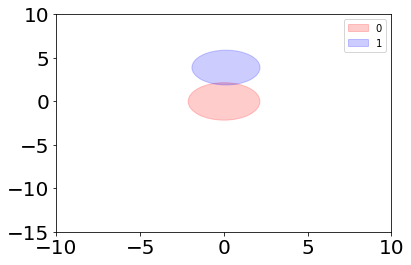

In [17]:
plt.figure()
plt.xlim(-10, 10)
plt.ylim(-15, 10)
e1=plot_ellipse(plt.gca(), model.theta_[0], np.identity(2)*model.sigma_[0], color="red", label="0")
e2=plot_ellipse(plt.gca(), model.theta_[1], np.identity(2)*model.sigma_[1], color="blue", label="1")
plt.legend([e1, e2], ["0", "1"]);